<a href="https://colab.research.google.com/github/rachPD/Handwritten-Bengali-Grapheme-Classification/blob/main/Bengali_handwritten_grapheme_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KAGGLE reqs


In [ ]:
# from google.colab import files
# files.upload()  #upload kaggle.json file
# !pip install -q kaggle
# !pip install --upgrade kaggle
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


In [ ]:
!kaggle datasets download -d chefpr7/resnet50ori

 92% 225M/245M [00:06<00:00, 26.6MB/s]
100% 245M/245M [00:06<00:00, 41.9MB/s]


In [ ]:
!mv '/content/drive/My Drive/resnet50bengai.pth' '/content/drive/My Drive/resnet50'

In [ ]:
!kaggle datasets init -p /content/drive/My\ Drive/resnet50

Data package template written to: /content/drive/My Drive/resnet50/dataset-metadata.json


In [ ]:
!kaggle datasets create -p /content/drive/My\ Drive/resnet50

Starting upload for file resnet50bengai.pth
100% 183M/183M [00:06<00:00, 30.3MB/s]
Upload successful: resnet50bengai.pth (183MB)
Starting upload for file resnet50NEW.pth
100% 126M/126M [00:03<00:00, 37.0MB/s]
Upload successful: resnet50NEW.pth (126MB)
Your private Dataset is being created. Please check progress at https://www.kaggle.com/chefpr7/effnb3


In [ ]:
!pip install pretrainedmodels

     |████████████████████████████████| 61kB 6.0MB/s 
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-cp36-none-any.whl size=60962 sha256=f51878815931495ecf827aa2ec46a4cc4d443533f4261b22b676fd0fe71e38ab
  Stored in directory: /root/.cache/pip/wheels/69/df/63/62583c096289713f22db605aa2334de5b591d59861a02c2ecd
Successfully built pretrainedmodels


#mount drive

In [ ]:
!wget 

--2020-03-18 14:21:23--  https://he-s3.s3.amazonaws.com/media/hackathon/hackerearth-deep-learning-challenge-auto-tag-images-gala/auto-tag-images-of-the-gala-9e47fb31/9d34462453e311ea.zip?Signature=p9H6GHy%2B%2BZ%2Bzhfz4YWZVUwwDgRo%3D
Resolving he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)... 52.219.32.144
Connecting to he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)|52.219.32.144|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2020-03-18 14:21:23 ERROR 403: Forbidden.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!unzip -qq '/content/drive/My Drive/bengali.zip'

In [ ]:
!git clone https://github.com/RobinSmits/KaggleBengaliAIHandwrittenGraphemeClassification

Cloning into 'KaggleBengaliAIHandwrittenGraphemeClassification'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 32 (delta 4), reused 14 (delta 4), pack-reused 17
Unpacking objects: 100% (32/32), done.
Checking out files: 100% (14/14), done.


In [ ]:
#For using cutmix 
! pip install git+https://github.com/ildoonet/cutmix

  Cloning https://github.com/ildoonet/cutmix to /tmp/pip-req-build-acv8rp99
  Running command git clone -q https://github.com/ildoonet/cutmix /tmp/pip-req-build-acv8rp99
  Created wheel for cutmix: filename=cutmix-0.1-cp36-none-any.whl size=3602 sha256=5a9f4f4dd9c6eb3116681345e021b09334002eb784efde27fc46a706b5af141d
  Stored in directory: /tmp/pip-ephem-wheel-cache-amp3y332/wheels/8a/40/20/615302921d0fef73e55b17b5dd57169d4879dfe6dd7ad8ff50
Successfully built cutmix


In [ ]:
#for using efficientnet models in pytorch 
!pip install efficientnet_pytorch

  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.6.3-cp36-none-any.whl size=12422 sha256=5f2d8ea78f57076d7408ff7b4ae4564e960199cf0d9bc9ac99ed0d4cf29fae45
  Stored in directory: /root/.cache/pip/wheels/42/1e/a9/2a578ba9ad04e776e80bf0f70d8a7f4c29ec0718b92d8f6ccd
Successfully built efficientnet-pytorch


In [ ]:
from __future__ import print_function, division
import os
import cv2
from PIL import Image
import pdb
import time
import copy
import warnings
import random
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.nn import functional as F
import torch.optim as optim
import torch.backends.cudnn as cudnn
from torch.utils.data import DataLoader, Dataset, sampler
from matplotlib import pyplot as plt
from albumentations import (HorizontalFlip,VerticalFlip, ShiftScaleRotate, Normalize, Resize, Compose, GaussNoise,RandomRotate90,Transpose,RandomBrightnessContrast,RandomCrop)
from albumentations.pytorch import ToTensor
import albumentations as albu
import matplotlib.image as mpi
#import segmentation_models_pytorch as smp
from pathlib import Path
from sklearn.metrics import recall_score
import gc
warnings.filterwarnings("ignore")
seed = 69
random.seed(seed)
os.environ["PYTHONHASHSEED"] = str(seed)
np.random.seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
from efficientnet_pytorch import EfficientNet
#from cutmix.cutmix import CutMix                                     #INCLUDE THIS FOR USING CUTMIX AUGMENTATION IN PYTORCH 
#from cutmix.utils import CutMixCrossEntropyLoss                      #INCLUDE THIS FOR USING CUTMIX AUGMENTATION IN PYTORCH

##PREPARING DATA 

In [ ]:
datadir = Path('bengali_ai')
featherdir = Path('bengaliaifeather')
outdir = Path('.')

CONVERTING IMAGES FILES FROM FEATHER FORMAT(BINARY VECTORS) TO .JPG FILES 

In [ ]:
def prepare_image(datadir, featherdir, data_type='train',
                  submission=False, indices=[0, 1, 2, 3]):
    assert data_type in ['train', 'test']
    if submission:
        image_df_list = [pd.read_parquet(datadir / f'{data_type}_image_data_{i}.parquet')
                         for i in indices]
    else:
        image_df_list = [pd.read_feather(featherdir / f'{data_type}_image_data_{i}.feather')
                         for i in tqdm(indices)]

    print('image_df_list', len(image_df_list))
    HEIGHT = 137
    WIDTH = 236
    for df in tqdm(image_df_list):
        for i in tqdm(range(len(df))):
            images = df.iloc[i]
            image = images.iloc[1:].values
            name = images.iloc[0]
            path = os.path.join("bengali_images",name+".jpg")
            image = image.reshape(137,236).astype(np.uint8)
            cv2.imwrite(path,image)
            
           
    #images = [df.iloc[:, 1:].values.reshape(-1, HEIGHT, WIDTH) for df in image_df_list]
    del image_df_list
    gc.collect()
    #images = np.concatenate(images, axis=0)
    return height


In [ ]:
debug = False
train = pd.read_csv(datadir/'train.csv')
train_labels = train[['grapheme_root', 'vowel_diacritic', 'consonant_diacritic']].values
indices = [0] if debug else [0, 1, 2, 3]
train_images = prepare_image(
    datadir, featherdir, data_type='train', submission=False, indices=indices)

In [ ]:
model = EfficientNet.from_name('efficientnet-b0')
in_features = model._fc.in_features
model._fc = nn.Linear(in_features,7)

In [ ]:
model2 = EfficientNet.from_name('efficientnet-b0')
in_features = model2._fc.in_features
model2._fc = nn.Linear(in_features,11)

In [ ]:
model3 = EfficientNet.from_name('efficientnet-b3')
in_features = model3._fc.in_features
model3._fc = nn.Linear(in_features,168)

In [ ]:
model = EfficientNet.from_pretrained('efficientnet-b3',num_classes=186)

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b3-5fb5a3c3.pth" to /root/.cache/torch/checkpoints/efficientnet-b3-5fb5a3c3.pth



Loaded pretrained weights for efficientnet-b3


In [ ]:
import pretrainedmodels
model_name = 'resnet50' # could be fbresnet152 or inceptionresnetv2
model = pretrainedmodels.__dict__[model_name](num_classes=1000, pretrained='imagenet')

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [ ]:
in_features = model.last_linear.in_features
model.last_linear = nn.Linear(in_features,186)
#model._fc.requires_grad = False
#model._fc.bias.requires_grad = False

In [ ]:
ckpt_path = "consonant_modelx.pth"
ckpt_path2 = "vowel_diactric.pth"
ckpt_path3 = "final_grapheme.pth"
device = torch.device("cuda")
#model = smp.Unet("resnet18", encoder_weights=None, classes=4, activation=None)
model.to(device)
model2.to(device)
model3.to(device)
#model.eval()
state = torch.load(ckpt_path, map_location=lambda storage, loc: storage)
state2 = torch.load(ckpt_path2, map_location=lambda storage, loc: storage)
state3 = torch.load(ckpt_path3, map_location=lambda storage, loc: storage)
model.load_state_dict(state["state_dict"])
model2.load_state_dict(state2["state_dict"])
model3.load_state_dict(state3["state_dict"])

In [ ]:
import PIL
def threshold_image(img):
    '''
    Helper function for thresholding the images
    '''
    gray = PIL.Image.fromarray(np.uint8(img), 'L')
    ret,th = cv.threshold(np.array(gray),0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    return th


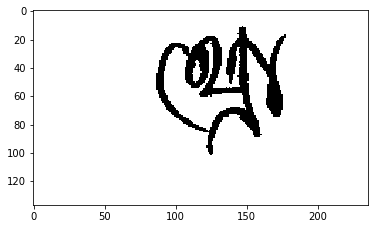

In [ ]:
df = pd.read_csv('train.csv')
img=cv2.imread( os.path.join('bengali_images/',df["image_id"].iloc[4]+'.jpg'),0)
_,img = cv2.threshold(np.array(img),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(img,cmap='gray')

##DATALOADERS

In [ ]:
class Dataset(Dataset):
    def __init__(self, df, data_folder, mean, std, phase):
        self.df = df
        self.root = data_folder
        self.mean = mean
        self.std = std
        self.phase = phase
        self.transforms = get_transforms(phase, mean, std)
        self.transforms2 = get_transforms2(mean, std)
        self.fnames = self.df.index

    def __getitem__(self, idx):
        image_id = self.df["image_id"].iloc[idx]
        image_path = os.path.join(self.root,  image_id+'.jpg')
        img = cv2.imread(image_path,0)
        #print(img.shape)
        _ ,img = cv2.threshold(np.array(img),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        
        img = crop_char_image3(255-img)
        #print(img.shape)
        #img = img.reshape(137,236,1)
        img = img.reshape(img.shape[0],img.shape[1],1)
        img = np.concatenate([img,img,img],axis=2)
    
        label = np.asarray(self.df.iloc[idx].iloc[1:]).astype(np.uint8)
        augmented = self.transforms(image=img)
        imgtf1 = augmented['image']
        #aug = self.transforms2(image = img)
        #imgtf2 = aug["image"]
        #imag2 = imag2.reshape(imag2.shape[0],imag2.shape[1],1)
        #imag2 = np.concatenate([imag2,imag2,imag2],axis=2)
        #aug = self.transforms(image=imag2)
        #imagtf1 = aug['image']
        #aug = self.transforms2(image = imag2)
        #imagtf2 = aug["image"]
        return imgtf1,label

    def __len__(self):
        return len(self.fnames)


def get_transforms(phase, mean, std):
    list_transforms = []
    if phase == 'train':
        list_transforms.extend(
            [GaussNoise(p=0.2),
                   RandomBrightnessContrast(p=0.5),
                   ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.1, rotate_limit=10, interpolation=2, border_mode=1, p=1),
                   ]
        )
    list_transforms.extend(
        [ 
            Resize(64,64,interpolation = 2),
            Normalize(mean=mean, std=std, p=1),
            ToTensor(),
        ]
    )
    list_trfms = Compose(list_transforms)
    return list_trfms
def get_transforms2( mean, std):
    list_transforms = []
    list_transforms.extend(
        [ 
            
            Resize(224,224,interpolation = 2),
            Normalize(mean=mean, std=std, p=1),
            ToTensor(),
        ]
    )
    list_trfms = Compose(list_transforms)
    return list_trfms
def crop_char_image3(image, threshold=80):
    assert image.ndim == 2
    is_black = image > threshold

    is_black_vertical = np.sum(is_black, axis=0) > 0
    is_black_horizontal = np.sum(is_black, axis=1) > 0
    left = np.argmax(is_black_horizontal)
    right = np.argmax(is_black_horizontal[::-1])
    top = np.argmax(is_black_vertical)
    bottom = np.argmax(is_black_vertical[::-1])
    height, width = image.shape
    cropped_image = image[left:height - right, top:width - bottom]
    return cropped_image

def provider(
    data_folder,
    df_path,
    phase,
    mean=None,
    std=None,
    batch_size=8,
    num_workers=0,
):
    '''Returns dataloader for the model training'''
    data = pd.read_csv(df_path)

    #label = data['grapheme_root']
    label3 = data['consonant_diacritic']
    label2 = data['vowel_diacritic']
    label = data['grapheme_root']
    data2 = pd.get_dummies(label)
    data3 = pd.get_dummies(label2)
    data4 =  pd.get_dummies(label3)
    dict={}
    for i in range(168):
        dict[(i)] = i+1
    data2.rename(columns=dict,inplace=True)    
    dict2 = {}
    for i in range(11):
        dict2[(i)] = i+169
    data3.rename(columns=dict2,inplace=True)    
    dict3= {}
    for i in range(7):
        dict3[(i)] = i+180
    data4.rename(columns=dict3,inplace=True)
    
    data=data.drop(columns=['grapheme_root','vowel_diacritic','consonant_diacritic','grapheme'])
    data=pd.concat([data,data2,data3,data4],axis=1)
    train_df, val_df = train_test_split(data, test_size=0.001,stratify=label)
    df = train_df if phase == "train" else val_df
    image_dataset = Dataset(df, data_folder, mean, std, phase)
    
    #class_sample_counts=np.unique(label, return_counts=True)[1]
   # weights = (1 / torch.Tensor(class_prob))
   # weighted_sampler = torch.utils.data.sampler.WeightedRandomSampler(weights, len(train_labels))
    #train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, sampler=weighted_sampler)
    
    #dataset = CutMix(image_dataset, num_class=186, beta=1.0, prob=0.5, num_mix=2)
    
    dataloader = DataLoader(
        #dataset,
        image_dataset,
        batch_size=batch_size,
        num_workers=num_workers,
        pin_memory=False,
        shuffle=True,   
    )
    return dataloader

##DEFINING METRICS AND HELPER FUNCTIONS 

In [ ]:
bs = 16
def predict(X, threshold):
    '''X is sigmoid output of the model'''
    X_p = np.copy(X)
    preds = (X_p > threshold).astype('uint8')
    return preds

def metric(probs, t, threshold=0.5, reduction='none'):
    '''Calculates dice of positive and negative images seperately'''
    '''probability and truth must be torch tensors'''
    batch_size = len(t)
    with torch.no_grad():
        #print(probability.shape,probs2.shape,probs3.shape,truth.shape)
        #probability = probability.view(batch_size, -1)
        #truth = truth.view(batch_size, -1)
        t = (t ).float().cpu()
        pt = probs[:,:168].argmax(dim=1)
        tt = t[:,:168].argmax(dim=1)
        pt2 = probs[:,168:179].argmax(dim=1)
        tt2 = t[:,168:179].argmax(dim=1)
        pt3 = probs[:,179:].argmax(dim=1)
        tt3 = t[:,179:].argmax(dim=1)
        csum = (pt==tt).sum().float()
        acc  = csum/bs
        rec_sc=recall_score(tt,pt,average = 'macro')
        csum = (pt2==tt2).sum().float()
        acc2 = csum/bs
        rec_sc2 = recall_score(tt2,pt2,average = 'macro')
        csum = (pt3==tt3).sum().float()
        acc3 = csum/bs
        rec_sc3 = recall_score(tt3,pt3,average = 'macro')

        #dice_pos = (2 * (p*t).sum(-1)+1)/(((p+t).sum(-1))+1)
        
        #p_neg = (p == 0).float()
        #t_neg = (t == 0).float()
        #dice_neg = (2 * (p_neg*t_neg).sum(-1)+1)/(((p_neg+t_neg).sum(-1))+1)

        #dice = torch.cat([dice_pos, dice_neg])

        #dice_neg = np.nan_to_num(dice_neg.mean().item(), 0)
        #dice_pos = np.nan_to_num(dice_pos.mean().item(), 0)
        #dice = dice.mean().item()


    return acc,rec_sc,acc2,rec_sc2,acc3,rec_sc3

class Meter:
    '''A meter to keep track of iou and dice scores throughout an epoch'''
    def __init__(self, phase, epoch):
        self.base_threshold = 0.5 # <<<<<<<<<<< here's the threshold
        self.phase = phase
        self.base_dice_scores = []
        self.rec_sc = []
        self.base_dice_scores2 = []
        self.rec_sc2 = []
        self.base_dice_scores3 = []
        self.rec_sc3 = []
        #self.dice_neg_scores = []
        #self.dice_pos_scores = []
        #self.iou_scores = []

    def update(self, targets, outputs):
        #print(outputs.shape)
        #probs = torch.softmax(outputs[:,:168],dim=1)
        #probs2 = torch.softmax(outputs[:,168:179],dim=1)
        #probs3 = torch.softmax(outputs[:,179:],dim=1)
        #print(probs,probs.shape)
        dice,rec,dice2,rec2,dice3,rec3 = metric(outputs, targets, self.base_threshold)

        self.base_dice_scores.append(dice)
        self.rec_sc.append(rec)
       
        self.base_dice_scores2.append(dice2)
        self.rec_sc2.append(rec2)
        
        self.base_dice_scores3.append(dice3)
        self.rec_sc3.append(rec3)
        #self.dice_pos_scores.append(dice_pos)
        #self.dice_neg_scores.append(dice_neg)
        #preds = predict(probs, self.base_threshold)
        #iou = compute_iou_batch(preds, targets, classes=[1])
        #self.iou_scores.append(iou)

    def get_metrics(self):
        dice = np.mean(self.base_dice_scores)
        rec = np.mean(self.rec_sc)
        dice2 = np.mean(self.base_dice_scores2)
        rec2 = np.mean(self.rec_sc2)
        dice3 = np.mean(self.base_dice_scores3)
        rec3 = np.mean(self.rec_sc3)
        #dice_neg = np.mean(self.dice_neg_scores)
        #dice_pos = np.mean(self.dice_pos_scores)
        #dices = [dice, dice_neg, dice_pos]
        #iou = np.nanmean(self.iou_scores)
        return dice,rec,dice2,rec2,dice3,rec3

def epoch_log(phase, epoch, epoch_loss, meter, start):
    '''logging the metrics at the end of an epoch'''
    dice,rec,dice2,rec2,dice3,rec3 = meter.get_metrics()
    print("Loss: %0.4f  | acc: %0.4f  | rec: %0.4f |acc2: %0.4f  | rec2: %0.4f| acc3: %0.4f | rec3: %0.4f" % (epoch_loss, dice, rec,dice2,rec2,dice3,rec3 ))
    return dice,rec,dice2,rec2,dice3,rec3
    #dice, dice_neg, dice_pos = dices
    #print("Loss: %0.4f  | acc: %0.4f  | rec: %0.4f " % (epoch_loss, dice, rec ))
    #return dice,rec

def compute_ious(pred, label, classes, ignore_index=255, only_present=True):
    '''computes iou for one ground truth mask and predicted mask'''
    pred[label == ignore_index] = 0
    ious = []
    for c in classes:
        label_c = label == c
        if only_present and np.sum(label_c) == 0:
            ious.append(np.nan)
            continue
        pred_c = pred == c
        intersection = np.logical_and(pred_c, label_c).sum()
        union = np.logical_or(pred_c, label_c).sum()
        if union != 0:
            ious.append(intersection / union)
    return ious if ious else [1]

def compute_iou_batch(outputs, labels, classes=None):
    '''computes mean iou for a batch of ground truth masks and predicted masks'''
    ious = []
    preds = np.copy(outputs) # copy is imp
    labels = np.array(labels) # tensor to np
    for pred, label in zip(preds, labels):
        ious.append(np.nanmean(compute_ious(pred, label, classes)))
    iou = np.nanmean(ious)
    return iou


## TRYING A CUSTOM FUNCTION TO SUPPLY CLASS WEIGHTS
$weight (class x)$ = $e^(-freq[class i]/freq[most occuring class])$

In [ ]:
df.head()

image_id  grapheme_root  vowel_diacritic  consonant_diacritic grapheme
0  Train_0             15                9                    5   ক্ট্রো
1  Train_1            159                0                    0        হ
2  Train_2             22                3                    5     খ্রী
3  Train_3             53                2                    2     র্টি
4  Train_4             71                9                    5     থ্রো

In [ ]:
df["vowel_diacritic"].nunique()

11

In [ ]:
df = pd.read_csv('/content/train.csv')
df.head()
x = df["grapheme_root"].value_counts()
gr = [0]*168
for i in range(len(x)):
    gr[x.index[i]]=x.values[i]

In [ ]:
for i in range(len(gr)):
    gr[i]=np.exp(-gr[i]/max(gr))

In [ ]:
#weights = []
#weights.append(gr)
#weights.append(vd)
#weights.append(cd)
#len(weights)
gr=torch.Tensor(gr)
vd=torch.Tensor(vd)
cd=torch.Tensor(cd)

In [ ]:
gr

[0.9746979848841162,
 0.9750378969939706,
 0.9429408314103613,
 0.9460694194464112,
 0.9439276872401755,
 0.9699516388813939,
 0.9477202119426896,
 0.9736789593785679,
 0.9730002009819598,
 0.9255141502886863,
 0.9738487229487731,
 0.9740185161177177,
 0.974867926124185,
 0.388714808443331,
 0.870425885213277,
 0.8279458449540238,
 0.8488461974472313,
 0.8757532982010876,
 0.7522450332877768,
 0.9526898923094402,
 0.9431052357044982,
 0.8485502775626753,
 0.5967760335728777,
 0.40752056665067915,
 0.9431052357044982,
 0.821619092743351,
 0.9706282706215826,
 0.9482160111529087,
 0.8760587047535993,
 0.6159076173894815,
 0.9266443026214365,
 0.8746852134677378,
 0.821619092743351,
 0.9765689690119786,
 0.9530221294088843,
 0.920365267081043,
 0.8365059732194667,
 0.951527974299331,
 0.5572573965639479,
 0.8980170284175842,
 0.8763642178123182,
 0.9482160111529087,
 0.7109319801497667,
 0.5310786307022247,
 0.8317072559321733,
 0.9752078974986387,
 0.90382839955342,
 0.9242242353055946,


In [ ]:
#x = [1,2,3]
#y = [4,5,6]
#x.append(y)
k=[]
k.append(x)
k.append(y)
k

[[1, 2, 3, [4, 5, 6]], [4, 5, 6]]

##TRAINER 

In [ ]:
class Trainer(object):
    '''This class takes care of training and validation of our model'''
    def __init__(self, model):
        self.num_workers = 0
        self.batch_size = {"train": 16, "val": 16}
        self.accumulation_steps = 1
        self.lr = 3e-6
        self.num_epochs = 15
        self.best_loss = float("inf")
        self.phases = ["train", "val"]
        self.device = torch.device("cuda:0")
        torch.set_default_tensor_type("torch.cuda.FloatTensor")
        self.net = model
        #pos_wt = torch.tensor([3.0])
        self.criterion1 = torch.nn.BCEWithLogitsLoss(weight=gr)
        self.criterion2 = torch.nn.BCEWithLogitsLoss(weight=vd)
        self.criterion3 = torch.nn.BCEWithLogitsLoss(weight=cd)
        #self.criterion = CutMixCrossEntropyLoss(True)
        #self.optimizer = optim.SGD(model.parameters(), lr=self.lr, momentum=0.09)
        self.optimizer = optim.Adam(self.net.parameters(), lr=self.lr)
        
        self.scheduler = ReduceLROnPlateau(self.optimizer,factor=0.33, mode="min", patience=3, verbose=True)
        self.net = self.net.to(self.device)
        cudnn.benchmark = True
        
        self.dataloaders = {
            phase: provider(
                data_folder=data_folder,
                df_path=train_df_path,
                phase=phase,
                mean=(0.485, 0.456, 0.406),
                std=(0.229, 0.224, 0.225),
                batch_size=self.batch_size[phase],
                num_workers=self.num_workers,
            )
            for phase in self.phases
        }
        self.losses = {phase: [] for phase in self.phases}
        self.rec_scores = {phase: [] for phase in self.phases}
        self.dice_scores = {phase: [] for phase in self.phases}
        self.rec_scores2 = {phase: [] for phase in self.phases}
        self.dice_scores2 = {phase: [] for phase in self.phases}
        self.rec_scores3 = {phase: [] for phase in self.phases}
        self.dice_scores3 = {phase: [] for phase in self.phases}
    def forward(self, images, targets):
        images = images.to(self.device)
        #print("targets =",targets.shape)
        #targets = targets.reshape(targets.shape[0],1)
        masks = targets.to(self.device)
        masks = masks.float()
        #masks = masks.reshape(4,1)
        outputs = self.net(images)
        #rec_sc=recall_score(masks.argmax(dim=1).cpu().numpy(),outputs.argmax(dim=1).cpu().numpy(),average = 'macro') 
        #print(outputs.type(),masks.type())
        #loss = self.criterion(outputs,masks)
        loss1 = self.criterion1(outputs[:,:168],masks[:,:168])#+(1-rec_sc)
        loss2 = self.criterion2(outputs[:,168:179],masks[:,168:179])
        loss3 = self.criterion3(outputs[:,179:],masks[:,179:])
        loss = 8*loss1+loss2+loss3
        #print(loss,rec_sc)
        #loss = self.criterion(outputs.permute(0,2,3,1), masks.permute(0,2,3,1))
        '''  after few epochs loss = "0.25*bce+0.75*dice"
        
        d1,d2,d3 = metric(outputs, mask, threshold=0.5, reduction='none')
        loss =  0.25*self.criterion(outputs.permute(0,2,3,1), masks.permute(0,2,3,1)) +0.75*(1-d1)
        
        '''

        return loss, outputs

    def iterate(self, epoch, phase):
        meter = Meter(phase, epoch)
        start = time.strftime("%H:%M:%S")
        print(f"Starting epoch: {epoch} | phase: {phase} | ⏰: {start}")
        batch_size = self.batch_size[phase]
        self.net.train(phase == "train")
        dataloader = self.dataloaders[phase]
        running_loss = 0.0
        total_batches = len(dataloader)
        tk0 = tqdm(dataloader, total=total_batches)
        self.optimizer.zero_grad()

        for itr, batch in enumerate(tk0):
                   
            img1, targets = batch
            loss, outputs = self.forward(img1, targets)
            #loss2, outputs2 = self.forward(img2, targets)
            #loss3, outputs3 = self.forward(img3, targets)
            #loss4, outputs4 = self.forward(img4, targets)
            
            #loss = (loss1+loss2+loss3+loss4)/4
            #outputs = (outputs1+outputs2+outputs3+outputs4)/4
            
            loss = loss / self.accumulation_steps

            if phase == "train":
                loss.backward()
                if (itr + 1 ) % self.accumulation_steps == 0:
                    self.optimizer.step()
                    self.optimizer.zero_grad()
            running_loss += loss.item()
            outputs = outputs.detach().cpu()
            meter.update(targets, outputs)
            tk0.set_postfix(loss=(running_loss / ((itr + 1))))
        epoch_loss = (running_loss * self.accumulation_steps) / total_batches
        dice,rec,dice2,rec2,dice3,rec3 = epoch_log(phase, epoch, epoch_loss, meter, start)
        self.losses[phase].append(epoch_loss)
        self.dice_scores[phase].append(dice)
        self.rec_scores[phase].append(rec)
        self.dice_scores2[phase].append(dice2)
        self.rec_scores2[phase].append(rec2)
        self.dice_scores3[phase].append(dice3)
        self.rec_scores3[phase].append(rec3)
        torch.cuda.empty_cache()
        return epoch_loss
    def start2(self):
        for epoch in range(self.num_epochs):
            
            val_loss = self.iterate(epoch, "val")
            self.scheduler.step(val_loss)
    def start(self): 
        for epoch in range(self.num_epochs):
            self.iterate(epoch, "train")
            state = {
                "epoch": epoch,
                "best_loss": self.best_loss,
                "state_dict": self.net.state_dict(),
                "optimizer": self.optimizer.state_dict(),
            }
            val_loss = self.iterate(epoch, "val")
            self.scheduler.step(val_loss)
            
            if val_loss < self.best_loss:
                print("******** New optimal found, saving state ********")
                state["best_loss"] = self.best_loss = val_loss
                torch.save(state, "/content/drive/My Drive/resnet50/resnet50NEW.pth")
            print()
            np.save("logacctrain.npy",self.dice_scores["train"])
            np.save("logrectrain.npy",self.rec_scores["train"])
            np.save("logaccval.npy",self.dice_scores["val"])
            np.save("logrecval.npy",self.rec_scores["val"])
            np.save("logacctrain2.npy",self.dice_scores2["train"])
            np.save("logrectrain2.npy",self.rec_scores2["train"])
            np.save("logaccval2.npy",self.dice_scores2["val"])
            np.save("logrecval2.npy",self.rec_scores2["val"])
            np.save("logacctrain3.npy",self.dice_scores3["train"])
            np.save("logrectrain3.npy",self.rec_scores3["train"])
            np.save("logaccval3.npy",self.dice_scores3["val"])
            np.save("logrecval3.npy",self.rec_scores3["val"])

In [ ]:
train_df_path = 'train.csv'
data_folder = "bengali_images"

In [ ]:
#model = smp.Unet('resnet18', classes=1, activation=None,encoder_weights='imagenet')

In [ ]:
device = torch.device("cuda")
model.to(device)

In [ ]:
model_trainer = Trainer(model)
model_trainer.start()

Starting epoch: 0 | phase: train | ⏰: 23:43:59


In [ ]:
scores = [0.9275,0.9676,0.9632]
np.average(scores, weights=[2,1,1])

In [ ]:
!unzip /content/resnet50ori.zip

Archive:  /content/resnet50ori.zip
  inflating: resnet50bengai.pth      


In [ ]:
ckpt_path = "/content/drive/My Drive/resnet50/resnet50NEW.pth"
device = torch.device("cuda")
#model = smp.Unet("resnet18", encoder_weights=None, classes=4, activation=None)
model.to(device)
#model.eval()
state = torch.load(ckpt_path, map_location=lambda storage, loc: storage)
model.load_state_dict(state["state_dict"])


<All keys matched successfully>

In [ ]:
def get_transforms2(mean=(0.485, 0.456, 0.406),
                std=(0.229, 0.224, 0.225)):
    list_transforms = []
    
    list_transforms.extend(
        [ 
            #HorizontalFlip(),
            Resize(224,224,interpolation = 2),
            Normalize(mean=mean, std=std, p=1),
            ToTensor(),
        ]
    )
    list_trfms = Compose(list_transforms)
    return list_trfms

In [ ]:
import glob
filenames = glob.glob('deepfake_frames/test/*.jpg')

In [ ]:
len(filenames)

In [ ]:
fig, axs = plt.subplots(48, 2, figsize=(10, 100))
axs = np.array(axs)
axs = axs.reshape(-1)
model.eval()
transforms = get_transforms2()
for i,j in enumerate(tqdm(filenames)):
    img = mpi.imread(j)
    augmented = transforms(image=img)
    img2 = augmented['image']
    img2=img2.reshape(1,3,img2.shape[1],img2.shape[2])

    img2=img2.to(device)
    prob = model(img2)
    prob = torch.sigmoid(prob)
    ax = axs[i]
    ax.imshow(img)
    ax.grid(False)
    ax.title.set_text(str(prob.cpu()))
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

# Post Processing

In [ ]:

def post_process(probability, threshold, min_size):
    '''Post processing of each predicted mask, components with lesser number of pixels
    than `min_size` are ignored'''
    mask = cv2.threshold(probability, threshold, 1, cv2.THRESH_BINARY)[1]
    num_component, component = cv2.connectedComponents(mask.astype(np.uint8))
    predictions = np.zeros((256, 320), np.int32)
    num = 0
    for c in range(1, num_component):
        p = (component == c)
        if p.sum() > min_size:
            predictions[p] = 1
            num += 1
    return predictions, num

In [ ]:
def get_transforms2(mean=(0.485, 0.456, 0.406),
                std=(0.229, 0.224, 0.225)):
    list_transforms = []
    list_transforms.extend(
        [   Resize(256,320,interpolation=2),
            Normalize(mean=mean, std=std, p=1),
            ToTensor(),
        ]
    )
    list_trfms = Compose(list_transforms)
    return list_trfms

In [ ]:
transforms = get_transforms2()

img = mpi.imread('file_name.jpg')
augmented = transforms(image=img)
img = augmented['image']
img2=img.reshape(1,3,img.shape[1],img.shape[2])
prob = model.predict(img2)
prob = torch.sigmoid(prob)
prob = prob[0,0].numpy()
output,num  = post_process(prob,0.5,200)